In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm


# Load the "mpg" dataset from seaborn's GitHub repository
df = sns.load_dataset('mpg')

In [2]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')

In [3]:
# Print the first few rows of the dataset
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [4]:
# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [5]:
# Calculate summary statistics of the dataset
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


array([[<Axes: title={'center': 'mpg'}>]], dtype=object)

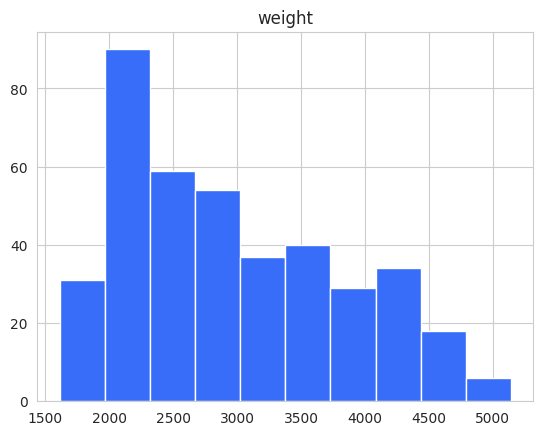

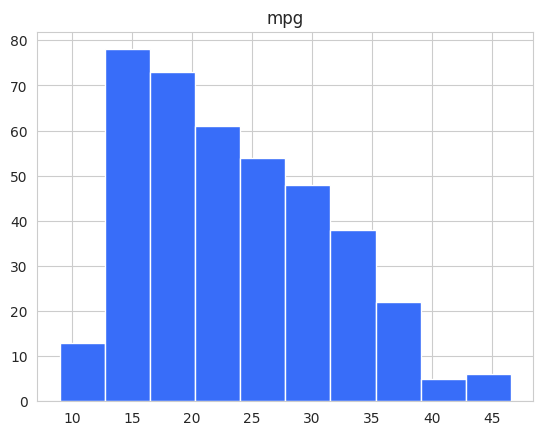

In [6]:
#Create a histogram of a numerical variable using seaborn's distplot() or matplotlib's hist() function to visualize its distribution.
df.hist('weight')
df.hist('mpg')

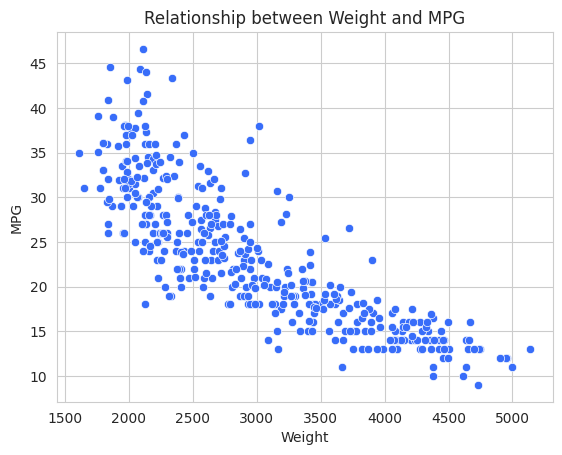

In [7]:
#Create a scatter plot of two numerical variables using seaborn's scatterplot() or matplotlib's scatter() function to identify any potential relationships.
sns.scatterplot(data=df, y='mpg', x='weight')

#Use appropriate axes labels, titles, and legends to enhance the readability of your visualizations.

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Relationship between Weight and MPG')
plt.show()

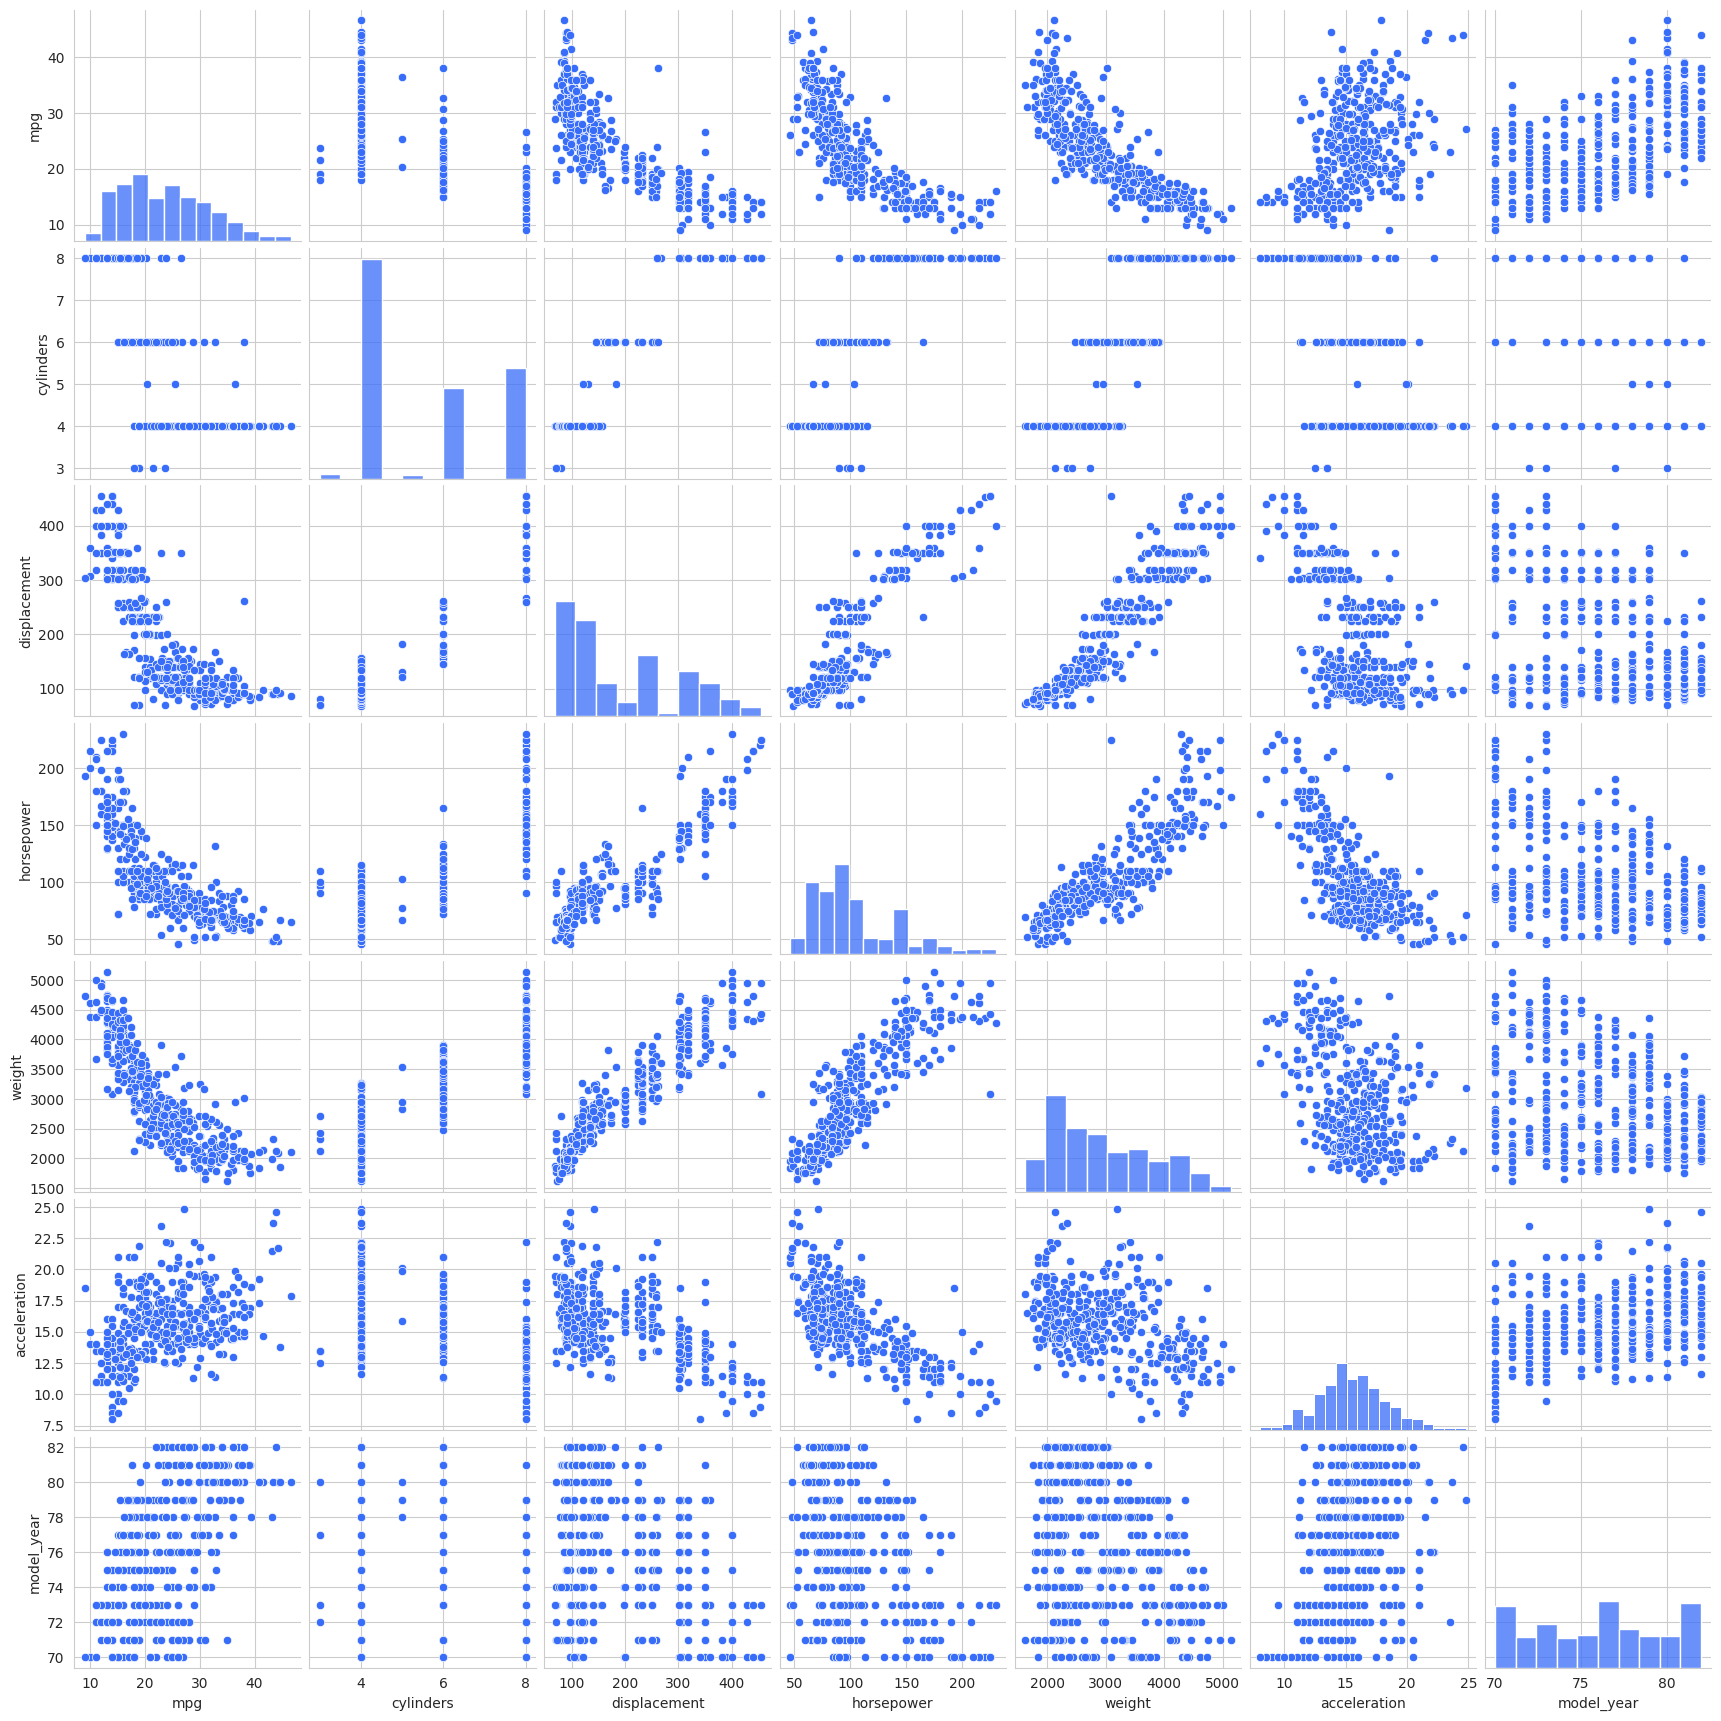

In [8]:
#Create a pairplot

# Create a pairplot of the dataset
sns.pairplot(data=df)
plt.show()

In [9]:
# Perform correlation matrix
cor = df.corr()
print(cor)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000  


<ipython-input-9-815e6813b8c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


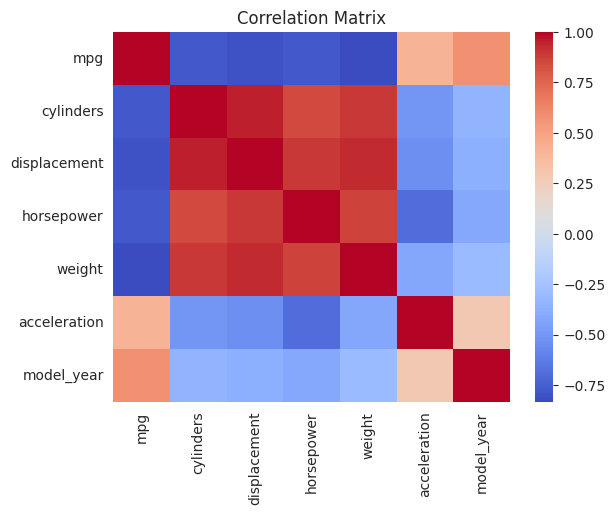

In [10]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(cor, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:

#Identify two numerical variables that seem to exhibit a linear relationship. Note down the names of these variables, as they will be used for implementing linear regression.



X = df.weight
y = df.mpg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

In [12]:
# Create an instance of the linear regression model
# Fit the model to the training data
model = sm.OLS(y_train,X_train).fit()

In [13]:
# Make predictions on the test data
#based on weight, relates to mpg
model.predict(X_test)

198    12.157553
396    17.779151
33     17.840108
208    26.685659
93     28.697243
84     14.223321
373    19.404673
94     32.070202
dtype: float64

In [14]:
y_pred =model.predict(X_test)

<Axes: xlabel='weight', ylabel='mpg'>

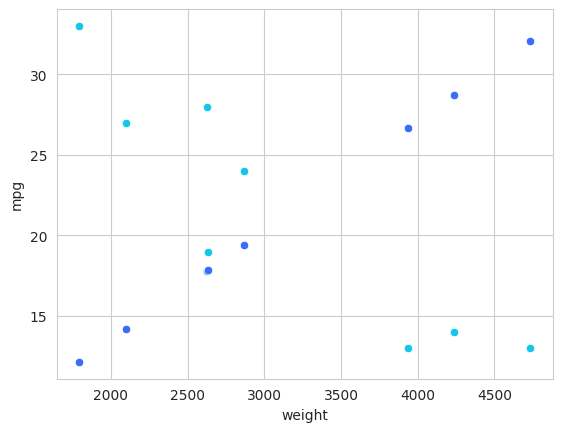

In [15]:
sns.scatterplot(x=X_test, y=y_pred)
sns.scatterplot(x=X_test, y=y_test)

In [16]:
model.summary(
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              945.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                   3.43e-106
Time:                        18:35:19   Log-Likelihood:                         -1565.5
No. Observations:                 390   AIC:                                      3133.
Df Residuals:                     389   BIC:                                      3137.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight         0.0068      0.000     30.753      0.000       0.006       0.007
==============================================================================
Omnibus:                       55.220   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.307
Skew:                          -0.042   Prob(JB):                     0.000782
Kurtosis:                       2.065   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""